In [1]:
import random
import agent as agent
from env import *
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Parameters

In [2]:
maximum_depth=3
num_of_Mu_chunks=2

Make an instance of tiger porblem environment

In [3]:
e=tiger_POMDP_env(read_config=True,config_address='./tiger.json',parameters=None)
e.discount_factor = 1
for i in range(1,len(e.actions)):
    e.observation_matrix[i][0][0]=0.5
    e.observation_matrix[i][0][1]=0.5
    e.observation_matrix[i][1][0]=0.5
    e.observation_matrix[i][1][1]=0.5

# listening cost
e.rewards[:,0]=-1.
# correct and low
e.rewards[0,1]=e.rewards[1,2]=10.
# incorrect and low
e.rewards[0,2]=e.rewards[1,1]=-100.
# correct and high
e.rewards[0,3]=e.rewards[1,4]=20.
# incorrect and high
e.rewards[0,4]=e.rewards[1,3]=-200.

make an instance of Bauerle and Rieder agent

In [4]:
ag=agent.Bauerle_Rieder_agent(environment=e, num_of_Mu_chunks=num_of_Mu_chunks,max_iterations=maximum_depth)

In [5]:
#TEMP VIS
get_possible_s = lambda step : ag.generate_possible_wealths(np.unique(ag.env.rewards),ag.initial_wealth,ag.env.discount_factor,step)
def vis_belief_state(belief,title="Belief"):
    wealth = list(get_possible_s(maximum_depth))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 5))
    fig.suptitle(title)
    ax1.set_title("Left")
    ax1.bar(list(np.arange(1,len(wealth)+1)), list(belief[0:len(wealth)]), width=1.0)
    ax1.set_xticks(list(np.arange(1,len(wealth)+1)))
    ax1.set_xticklabels([str(i) for i in wealth])
    ax1.set_ylim(0,num_of_Mu_chunks+1)
    ax2.set_title("Right")
    ax2.bar(list(np.arange(1,len(wealth)+1)), list(belief[len(wealth):len(wealth)*2]), width=1.0)
    ax2.set_xticks(list(np.arange(1,len(wealth)+1)))
    ax2.set_xticklabels([str(i) for i in wealth])
    ax2.set_ylim(0,num_of_Mu_chunks+1)
    plt.show()
    plt.close()

In [6]:
ag.pre_planning_paration(make_and_save_Mu=False,save_Mu2index_chunks=False)

Generation Possible Wealths
Length S 44


In [7]:
ident = lambda x: x
exp = lambda x: np.exp(x)
xa = ag.value_iteration(utility_function=ident)

  0%|          | 0/4 [00:00<?, ?it/s]

step: 3
==== iterations
MAPPED_VALUES [-600. -500. -401. -400. -390. -380. -301. -300. -290. -280. -202. -201.
 -200. -191. -190. -181. -180. -170. -160. -102. -101. -100.  -91.  -90.
  -81.  -80.  -70.  -60.   -3.   -2.   -1.    0.    8.    9.   10.   18.
   19.   20.   29.   30.   39.   40.   50.   60. -600. -500. -401. -400.
 -390. -380. -301. -300. -290. -280. -202. -201. -200. -191. -190. -181.
 -180. -170. -160. -102. -101. -100.  -91.  -90.  -81.  -80.  -70.  -60.
   -3.   -2.   -1.    0.    8.    9.   10.   18.   19.   20.   29.   30.
   39.   40.   50.   60.]
step: 2
a: 0
a: 1
a: 2
a: 3
a: 4


 50%|█████     | 2/4 [00:55<00:55, 27.96s/it]

------
step: 1
a: 0
a: 1
a: 2
a: 3
a: 4


 75%|███████▌  | 3/4 [01:46<00:34, 34.77s/it]

------
step: 0
a: 0
a: 1
a: 2
a: 3
a: 4


2.value-iteration<br>
<br>
Its result are in value_function, action_function, and step_indexes attributes

==========

<b>Simulation

After using value iteration, we have computed anything. So, we need to update our agent beliefs by interacting with environment.<br>
We have two essential functions here: do_action() and update_agent() 

An experiment with depth 2 and 3 chunk points

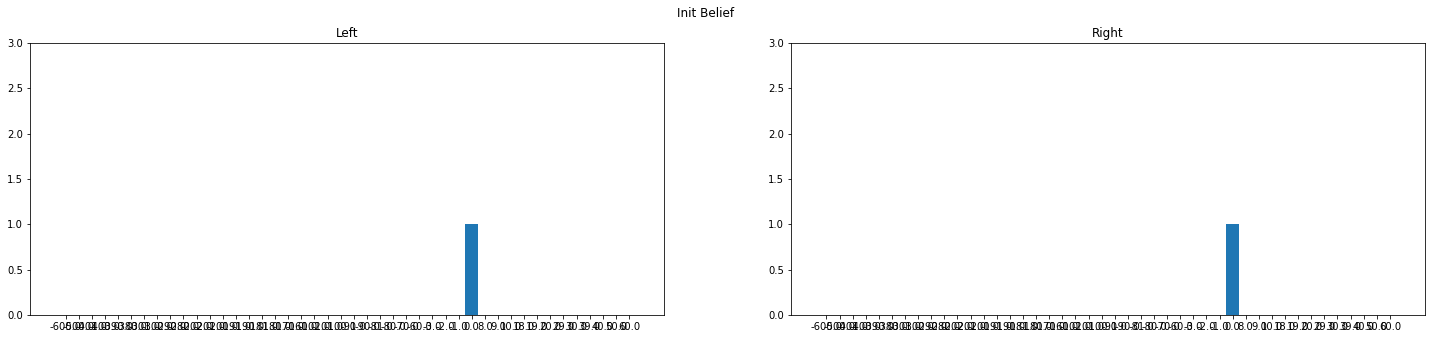

Agent: Action=listen Value: 18.0 True State: tiger_right 
EnvStep: NewState=tiger_right Observation=soud_right Reward=-1.0


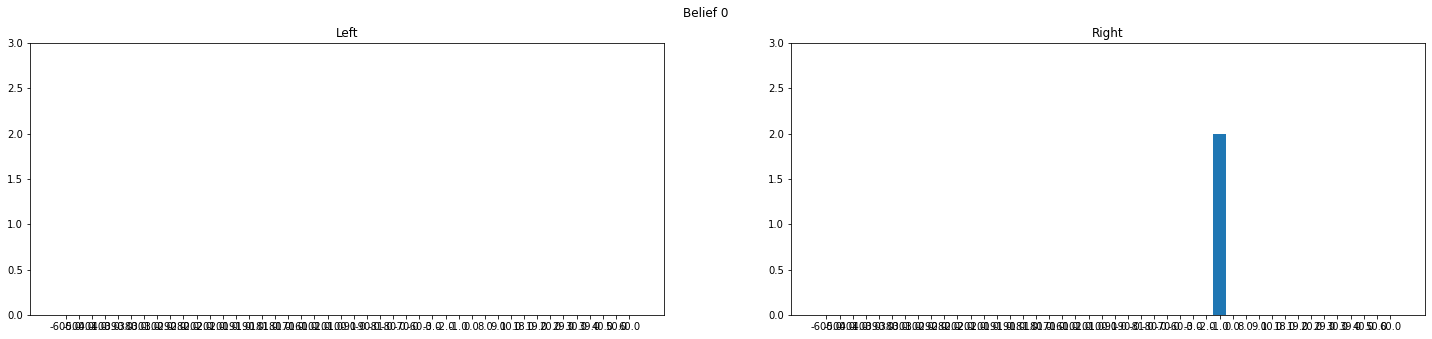

Agent: Action=open_left_high Value: 18.0 True State: tiger_right 
EnvStep: NewState=tiger_left Observation=soud_left Reward=20.0


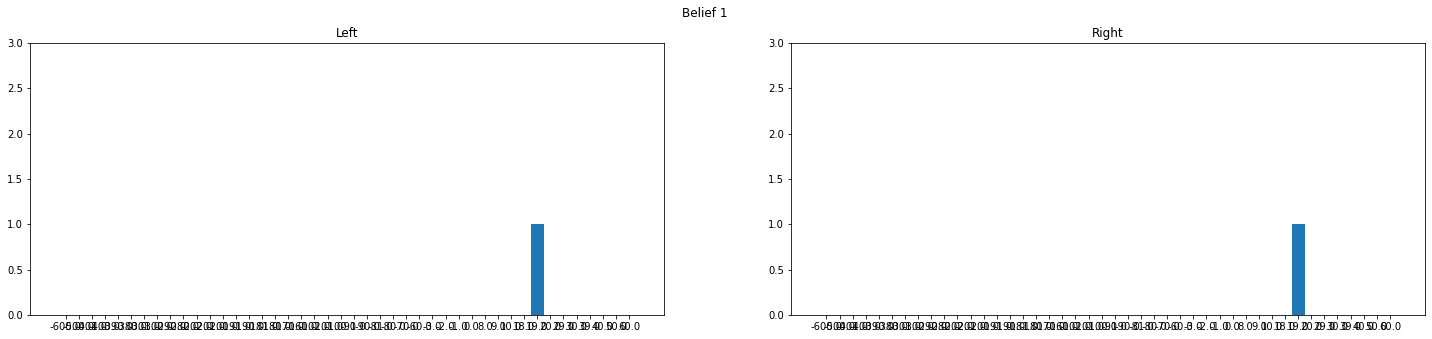

Agent: Action=listen Value: 18.0 True State: tiger_left 
EnvStep: NewState=tiger_left Observation=soud_left Reward=-1.0


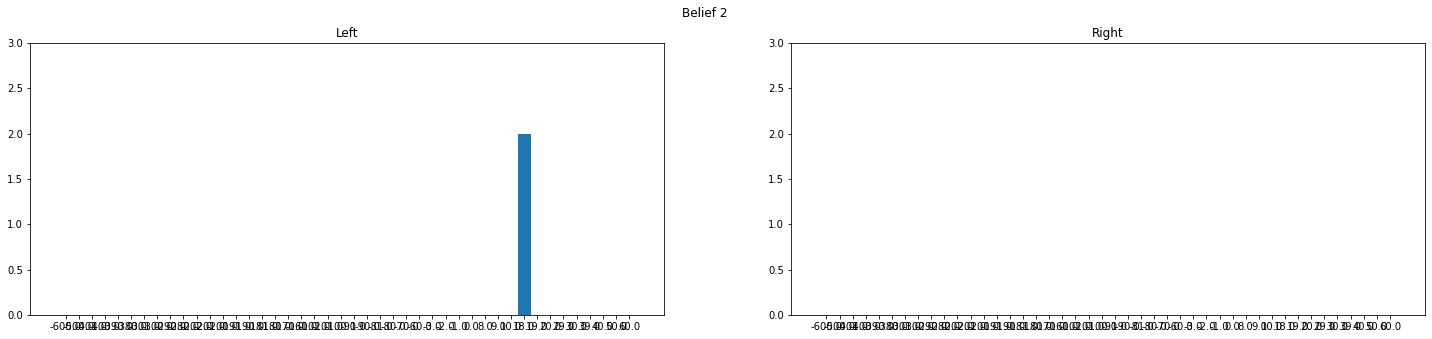

Actual Reward 18.0, Beliefed Reward: 18.0


In [8]:
num_to_act=dict(zip(list(e.actions.values()),list(e.actions.keys())))

# reset the agent with random starting x and probability of P(y=0 and s=0)=1/3 and P(y=1 and s=0)=2/3
ag.reset()

max_s = list(get_possible_s(maximum_depth))*2
acc_reward = 0

vis_belief_state(ag.current_internal_belief,title="Init Belief")

for t in range(maximum_depth):
    action,value,belief=ag.do_action()   
    print("Agent: Action={} Value: {} True State: {} ".format(num_to_act[action],value,e.states[e.current_state]))
    
    t1,t2,new_state,reward,new_observation=e.step(num_to_act[action])
    print("EnvStep: NewState={} Observation={} Reward={}".format(e.states[new_state],e.observations[new_observation],reward))
    
    acc_reward += reward
    
    ag.update_agent(new_observation)

    #print('Step: {} New State: {} New Observation: {} New Belief {}'.format(ag.current_internal_timeStep,e.current_state,new_observation,np.argmax(ag.current_internal_belief)))
    #print(ag.current_internal_belief)
    vis_belief_state(ag.current_internal_belief[0,:],title="Belief "+str(t))
    
print("Actual Reward {}, Beliefed Reward: {}".format(acc_reward,max_s[np.argmax(ag.current_internal_belief)]))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

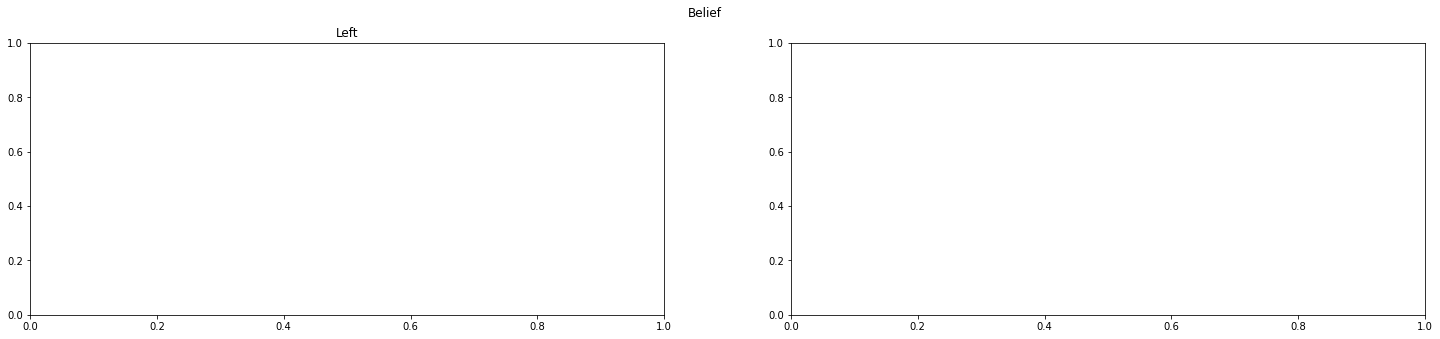

In [9]:
#%TODO
##TEST BELIEF UPDATE

#[0 0 0 2 0 0 0 0 0 1 0 0]
belief=np.zeros(shape=(1,38))
#left
belief[0,12]=2
belief[0,12+19]=2
vis_belief_state(belief[0,:])

step = 0
obs = 1
print(obs)
result=ag.say_calculator(x=0,
                         action=0,
                         x_prim=obs,
                         current_int_mu=belief,
                         z=np.power(ag.env.gamma,step),
                         current_possible_s=get_possible_s(step))
vis_belief_state(result[0,])